<a href="https://colab.research.google.com/github/CeroSahin/space_mission_analysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Mission Analysis

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Installations

In [ ]:
# %pip install iso3166

In [ ]:
# %pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration


In [ ]:
print(f"Shape: {df_data.shape}")
print(f"columns: {df_data.columns.values}")
print(f"Any NaN values? {df_data.isna().values.any()}")

Shape: (4324, 9)
columns: ['Unnamed: 0' 'Unnamed: 0.1' 'Organisation' 'Location' 'Date' 'Detail'
 'Rocket_Status' 'Price' 'Mission_Status']
Any NaN values? True


In [ ]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning

In [ ]:
df_data.drop(labels=["Unnamed: 0", "Unnamed: 0.1"], axis="columns", inplace=True)

In [ ]:
df_data.dropna(inplace=True)

## Descriptive Statistics

In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


In [ ]:
df_data.Price.max()

'90.0'

In [ ]:
# df_data.Date = pd.to_datetime(df_data.Date)
df_data.Price = df_data.Price.astype(str).str.replace(",", "")
df_data.Price = pd.to_numeric(df_data.Price)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    964 non-null    object 
 1   Location        964 non-null    object 
 2   Date            964 non-null    object 
 3   Detail          964 non-null    object 
 4   Rocket_Status   964 non-null    object 
 5   Price           964 non-null    float64
 6   Mission_Status  964 non-null    object 
dtypes: float64(1), object(6)
memory usage: 60.2+ KB


In [ ]:
print(f"The average price of missions: {round(df_data.Price.mean(), 2)}$")

The average price of missions: 153.79$


# Number of Launches per Company


In [ ]:
df_data.columns.values

array(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status',
       'Price', 'Mission_Status'], dtype=object)

In [ ]:
launches_per_company = df_data.groupby("Organisation").agg({"Detail": pd.Series.count})
launches_per_company.rename(columns={"Detail": "Launches"}, inplace=True)
launches_per_company.sort_values("Launches", ascending=False, inplace=True)
launches_per_company

,Launches
Organisation,
CASC,158
NASA,149
SpaceX,99
ULA,98
Arianespace,96
Northrop,83
ISRO,67
MHI,37
VKS RF,33


# Number of Active versus Retired Rockets


In [ ]:
print(f"Number of active rockets: {df_data.Detail[df_data.Rocket_Status == 'StatusActive'].count()}")
print(f"Number of retired rocekts: {df_data.Detail[df_data.Rocket_Status == 'StatusRetired'].count()}")

Number of active rockets: 586
Number of retired rocekts: 378


# Distribution of Mission Status


In [ ]:
print(f"Number of successful missions: {df_data.Mission_Status[df_data.Mission_Status == 'Success'].count()}")

Number of successful missions: 910


In [ ]:
print(f"Number of unsuccessful missions: {df_data.Mission_Status[df_data.Mission_Status == 'Failure'].count()}")

Number of unsuccessful missions: 36


# How Expensive are the Launches?


In [ ]:
cost_per_launch = df_data[["Detail", "Price"]]
cost_per_launch.set_index("Detail", inplace=True)
cost_per_launch

,Price
Detail,
Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,50.00
Long March 2D | Gaofen-9 04 & Q-SAT,29.75
Proton-M/Briz-M | Ekspress-80 & Ekspress-103,65.00
Atlas V 541 | Perseverance,145.00
"Long March 4B | Ziyuan-3 03, Apocalypse-10 & NJU-HKU 1",64.68
...,...
Titan IIIB | KH-8,59.00
Titan IIIA | LES 2 & LCS 1,63.23
Titan IIIA | LES 1,63.23


In [ ]:
df_data.loc[df_data.Price == cost_per_launch.Price.max()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success


In [ ]:
fig = px.histogram(cost_per_launch, x="Price", nbins=50)
fig.show()

# Choropleth Map Showing the Number of Launches by Country


In [ ]:
df_data.Location = df_data.Location.astype(str).str.replace("Gran Canaria", "USA")
df_data.Location = df_data.Location.astype(str).str.replace("Barents Sea", "Russion Federation")
df_data.Location = df_data.Location.astype(str).str.replace("Pacific Missile Range Facility", "USA")
df_data.Location = df_data.Location.astype(str).str.replace("Shahrud Missile Test Site", "Iran")
df_data.Location = df_data.Location.astype(str).str.replace("Yellow Sea", "China")
df_data.Location = df_data.Location.astype(str).str.replace("New Mexico", "USA")
df_data.Location = df_data.Location.astype(str).str.replace("Russia", "Russian Federation")

In [ ]:
df_data.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,USA


In [ ]:
df_data["Country"] = 0
for loc in df_data.Location.values:
  country = loc.split(", ")[-1]
  code = countries[country].alpha3
  df_data["Country"].loc[df_data.Location == loc] = code

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
fig = px.choropleth(
    df_data,
    locations="Country",
    color= "Price",
    color_continuous_scale = "Jet"
)
fig.show()

In [ ]:
df_data.Country.describe()

count     964
unique      8
top       USA
freq      490
Name: Country, dtype: object

# Choropleth Map Showing the Number of Failures by Country


In [ ]:
failures_by_cty = df_data[df_data.Mission_Status == "Failure"].groupby(["Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
failures_by_cty.columns = ["Country", "Fails"]
failures_by_cty

,Country,Fails
0,CHN,4
1,FRA,2
2,IND,5
3,KAZ,2
4,NZL,2
5,RUS,1
6,USA,20


In [ ]:
fig = px.choropleth(
    failures_by_cty,
    color="Fails",
    locations="Country",
    color_continuous_scale = "Magma"
)
fig.show()

# Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
new_df = df_data[["Country", "Organisation", "Mission_Status"]].groupby(
    ["Country", "Organisation"]).agg({"Mission_Status": pd.Series.count})
new_df.reset_index(inplace=True)
new_df

,Country,Organisation,Mission_Status
0,CHN,CASC,158
1,CHN,ExPace,1
2,FRA,Arianespace,94
3,FRA,ESA,1
4,IND,ISRO,67
5,JPN,JAXA,3
6,JPN,MHI,37
7,KAZ,Arianespace,2
8,KAZ,ILS,5
9,KAZ,Kosmotras,12


In [ ]:
fig =px.sunburst(
    data_frame=new_df,
    names="Organisation",
    parents="Country",
    values = "Mission_Status",
    color="Country",
    color_continuous_scale="magma"
)
fig.show()

# Analysing Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_spent_per_org = df_data[["Organisation", "Price"]].groupby("Organisation").agg({"Price": pd.Series.sum})
money_spent_per_org.sort_values("Price", ascending=False, inplace=True)

In [ ]:
max_money = money_spent_per_org.Price.max()
print(max_money)
row = money_spent_per_org.loc[money_spent_per_org.Price == max_money]
most_exp_org = row.index.values[0]
avg = money_spent_per_org.Price.mean()

76280.0


In [ ]:
print(f"The organisation who spent the most money on mission launches is: {most_exp_org}")
print(f"The biggest amount of money spent on mission launches by organisations is: {max_money} million dollars.")
print(f"The average amount of money spent by organisations is {round(avg, 2)} million dollars.")

The organisation who spent the most money on mission launches is: NASA
The biggest amount of money spent on mission launches by organisations is: 76280.0 million dollars.
The average amount of money spent by organisations is 5930.23 million dollars.


# Analysing the Amount of Money Spent by Organisation per Launch

In [ ]:
money_per_launch = df_data[["Organisation", "Detail", "Price"]]
money_per_launch.sort_values("Price", ascending=False, inplace=True)
money_per_launch


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Detail,Price
1916,RVSN USSR,Energiya/Buran | Buran,"5,000.00"
2000,RVSN USSR,Energiya/Polyus | Polyus Space Station,"5,000.00"
3545,NASA,Saturn V | Apollo 11,"1,160.00"
3603,NASA,Saturn V | Apollo 8,"1,160.00"
3475,NASA,Saturn V | Apollo 13,"1,160.00"
...,...,...,...
399,CASC,"Long March 11 | XPNAV 1, Xiaoxiang 1 & Others",5.30
166,CASC,Long March 11 | Jilin-1 Hyperspectral & Others,5.30
133,CASC,Long March 11H | Jilin-1 & Others,5.30
249,CASC,Long March 11 | Zhuhai-1 2A to 2D,5.30


In [ ]:
avg_money_per_launch = df_data.groupby(["Organisation"], as_index=False).agg({"Price": pd.Series.mean})
avg_money_per_launch.sort_values("Price", ascending=False, inplace=True)
avg_money_per_launch.head()

,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00


# The Number of Launches per Year

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN


In [ ]:
df_data["Year"] = 0
for date in df_data.Date.values:
  year = date.split(" ")[3]
  df_data.Year.loc[df_data.Date == date] = year

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_data.Year = pd.to_datetime(df_data.Year)

In [ ]:
launches_per_year = df_data[["Detail", "Year"]].groupby("Year").agg({"Detail": pd.Series.count})
launches_per_year

,Detail
Year,
1964-01-01,2
1965-01-01,2
1966-01-01,3
1967-01-01,8
1968-01-01,10
1969-01-01,8
1970-01-01,1
1971-01-01,2
1972-01-01,2


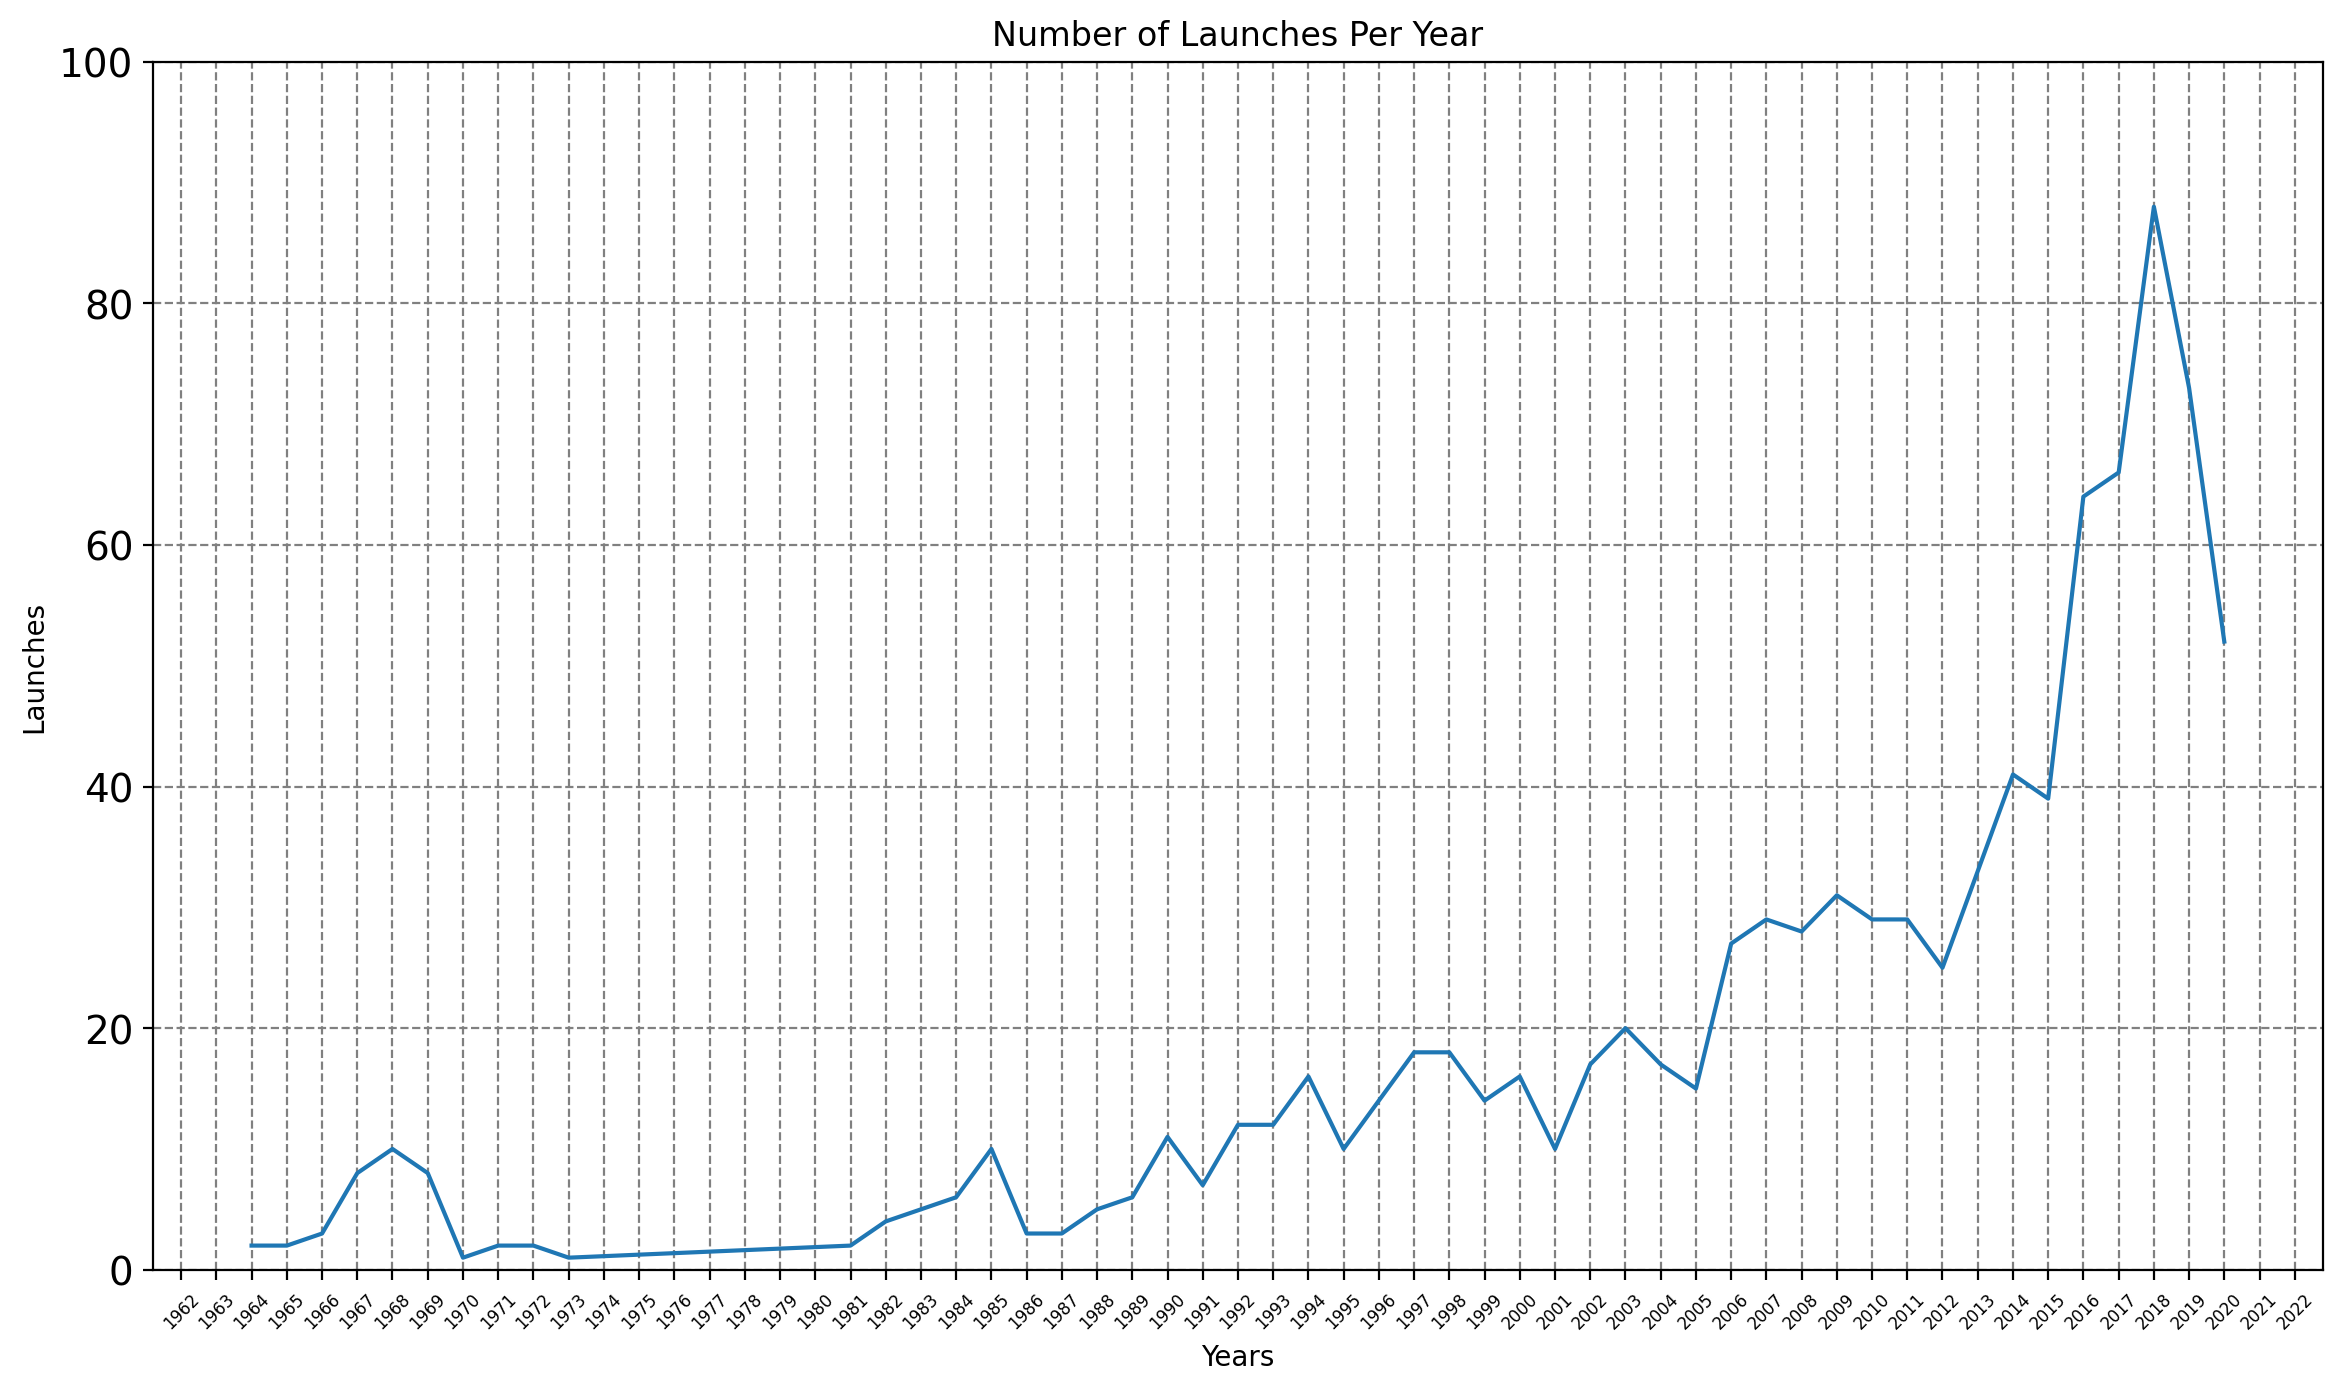

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title("Number of Launches Per Year")
plt.yticks(fontsize=14)
plt.xticks(fontsize=6, rotation=45)

ax = plt.gca()
ax.grid(color="grey", linestyle="--")
ax.set_ylim([0, 100])
# using the locators we set in the imports
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

ax.set_xlabel("Years")
ax.set_ylabel("Launches")
ax.plot(launches_per_year.index, launches_per_year.Detail)


# Number of Launches - Month-on-Month until the Present


In [ ]:
dates = pd.to_datetime(df_data.Date)
months = [x.month for x in dates.values]
df_data["Month"] = months

In [ ]:
launches_per_month = df_data[["Month", "Detail"]].groupby("Month").agg({"Detail": pd.Series.count})
launches_per_month.reset_index(inplace=True)

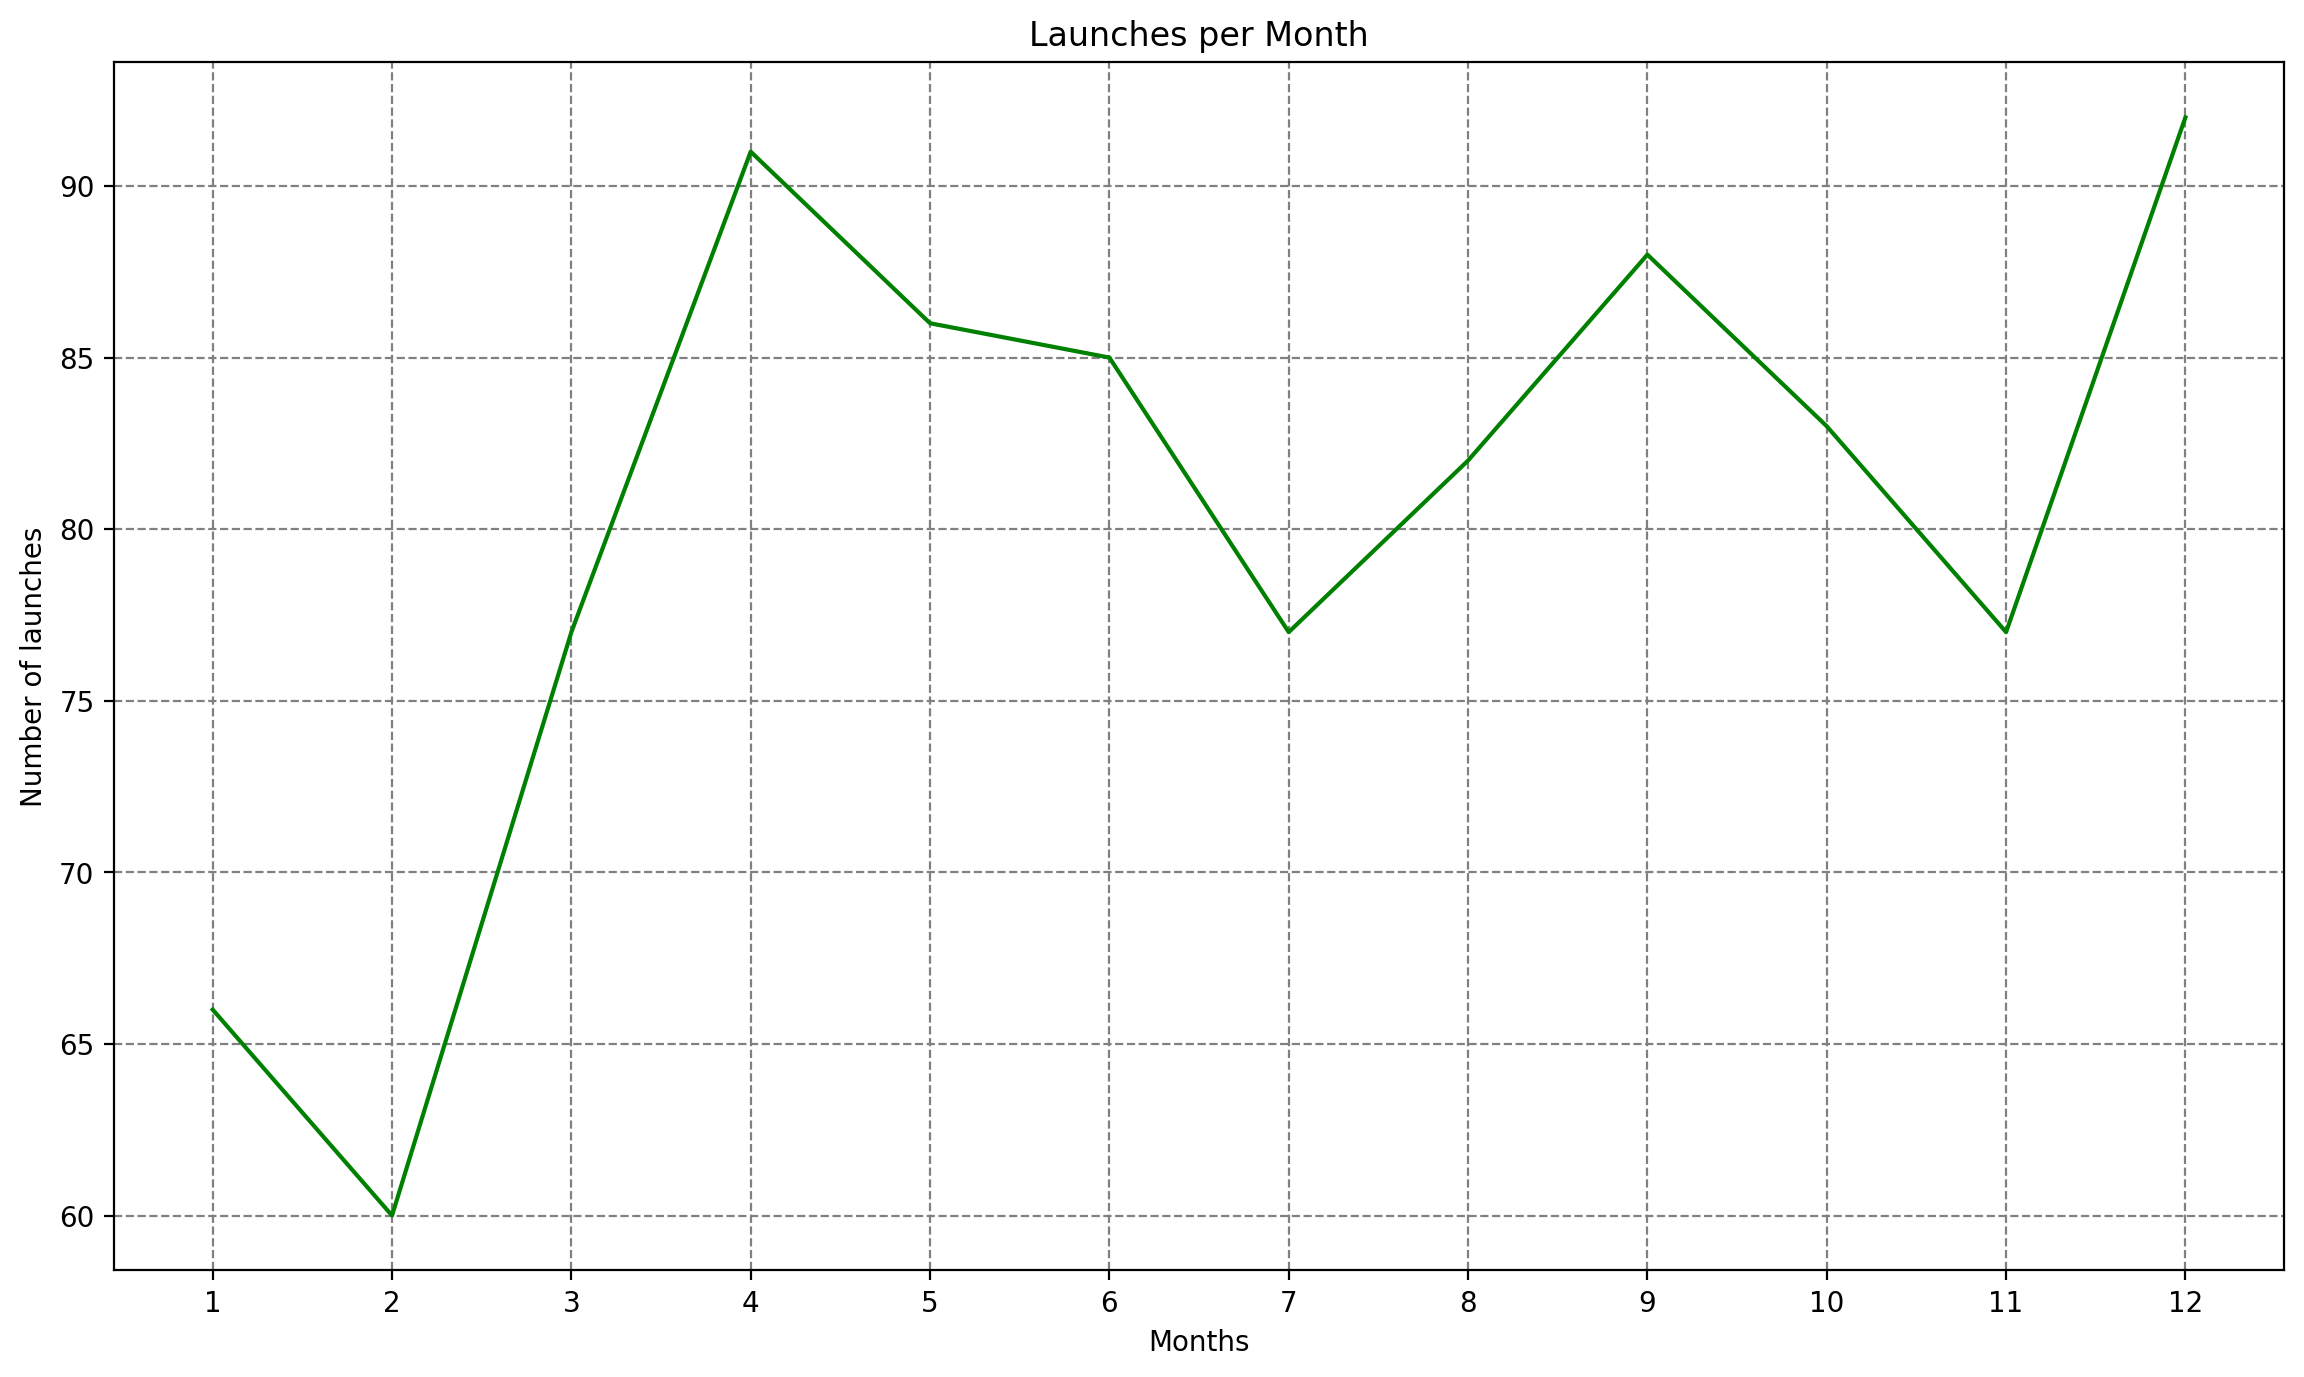

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(color="grey", linestyle="--")
plt.title("Launches per Month")
plt.xlabel("Months")
plt.ylabel("Number of launches")
plt.plot(
    launches_per_month.Month, launches_per_month.Detail, color="green"
)

# Which months are most popular and least popular for launches?


In [ ]:
print(f"The most popular months for launches are December and April.")
print(f"The less popular month for launches is February.")

The most popular months for launches are December and April.
The less popular month for launches is February.


# How has the Launch Price varied Over Time?


In [ ]:
price_over_time = df_data[["Price", "Year"]].groupby("Year").agg({"Price": pd.Series.sum})
price_over_time.sort_values("Year", ascending=False, inplace=True)

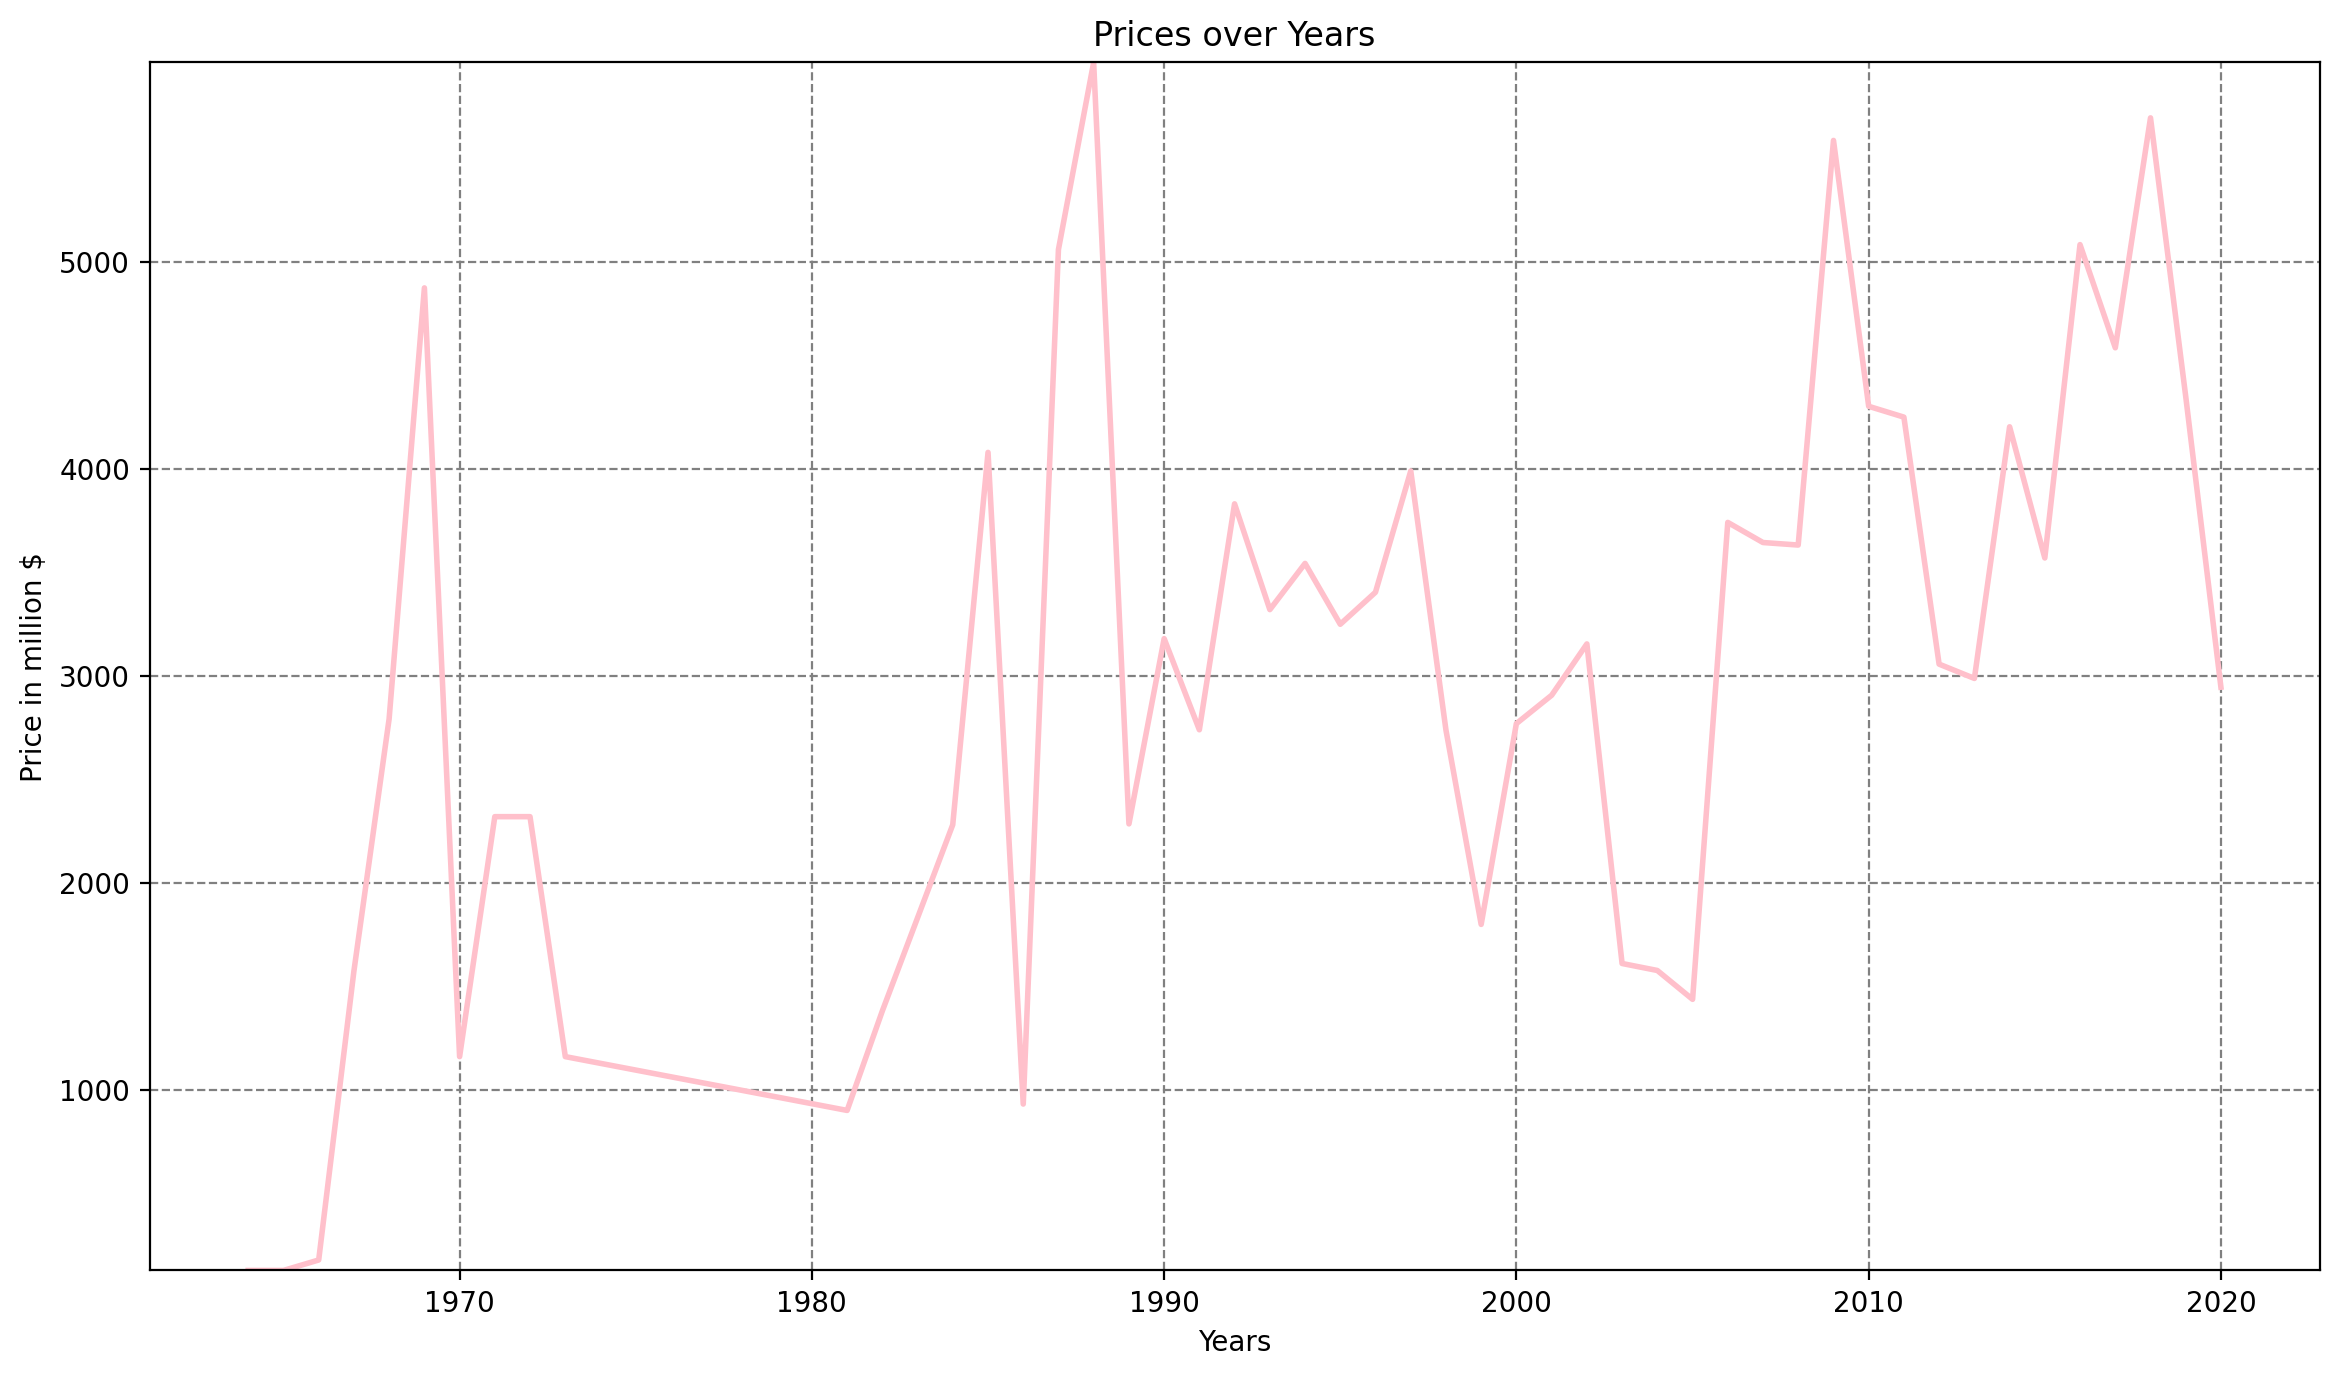

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title("Prices over Years")
plt.xlabel("Years")
plt.ylabel("Price in million $")
plt.ylim([price_over_time.Price.min(), price_over_time.Price.max()])
plt.grid(color="grey", linestyle="--")
plt.plot(price_over_time.index, price_over_time.Price, color="pink", linewidth=2)

#  Number of Launches over Time by the Top 10 Organisations.


In [ ]:
nasa_df = df_data[df_data.Organisation == "NASA"]
casc_df = df_data[df_data.Organisation == "CASC"]
spacex_df = df_data[df_data.Organisation == "SpaceX"]

In [ ]:
nasa = nasa_df.groupby(["Organisation", "Year"]).agg({"Detail": pd.Series.count})
nasa.reset_index(inplace=True)
casc = casc_df.groupby(["Organisation", "Year"]).agg({"Detail": pd.Series.count})
casc.reset_index(inplace=True)
spacex = spacex_df.groupby(["Organisation", "Year"]).agg({"Detail": pd.Series.count})
spacex.reset_index(inplace=True)

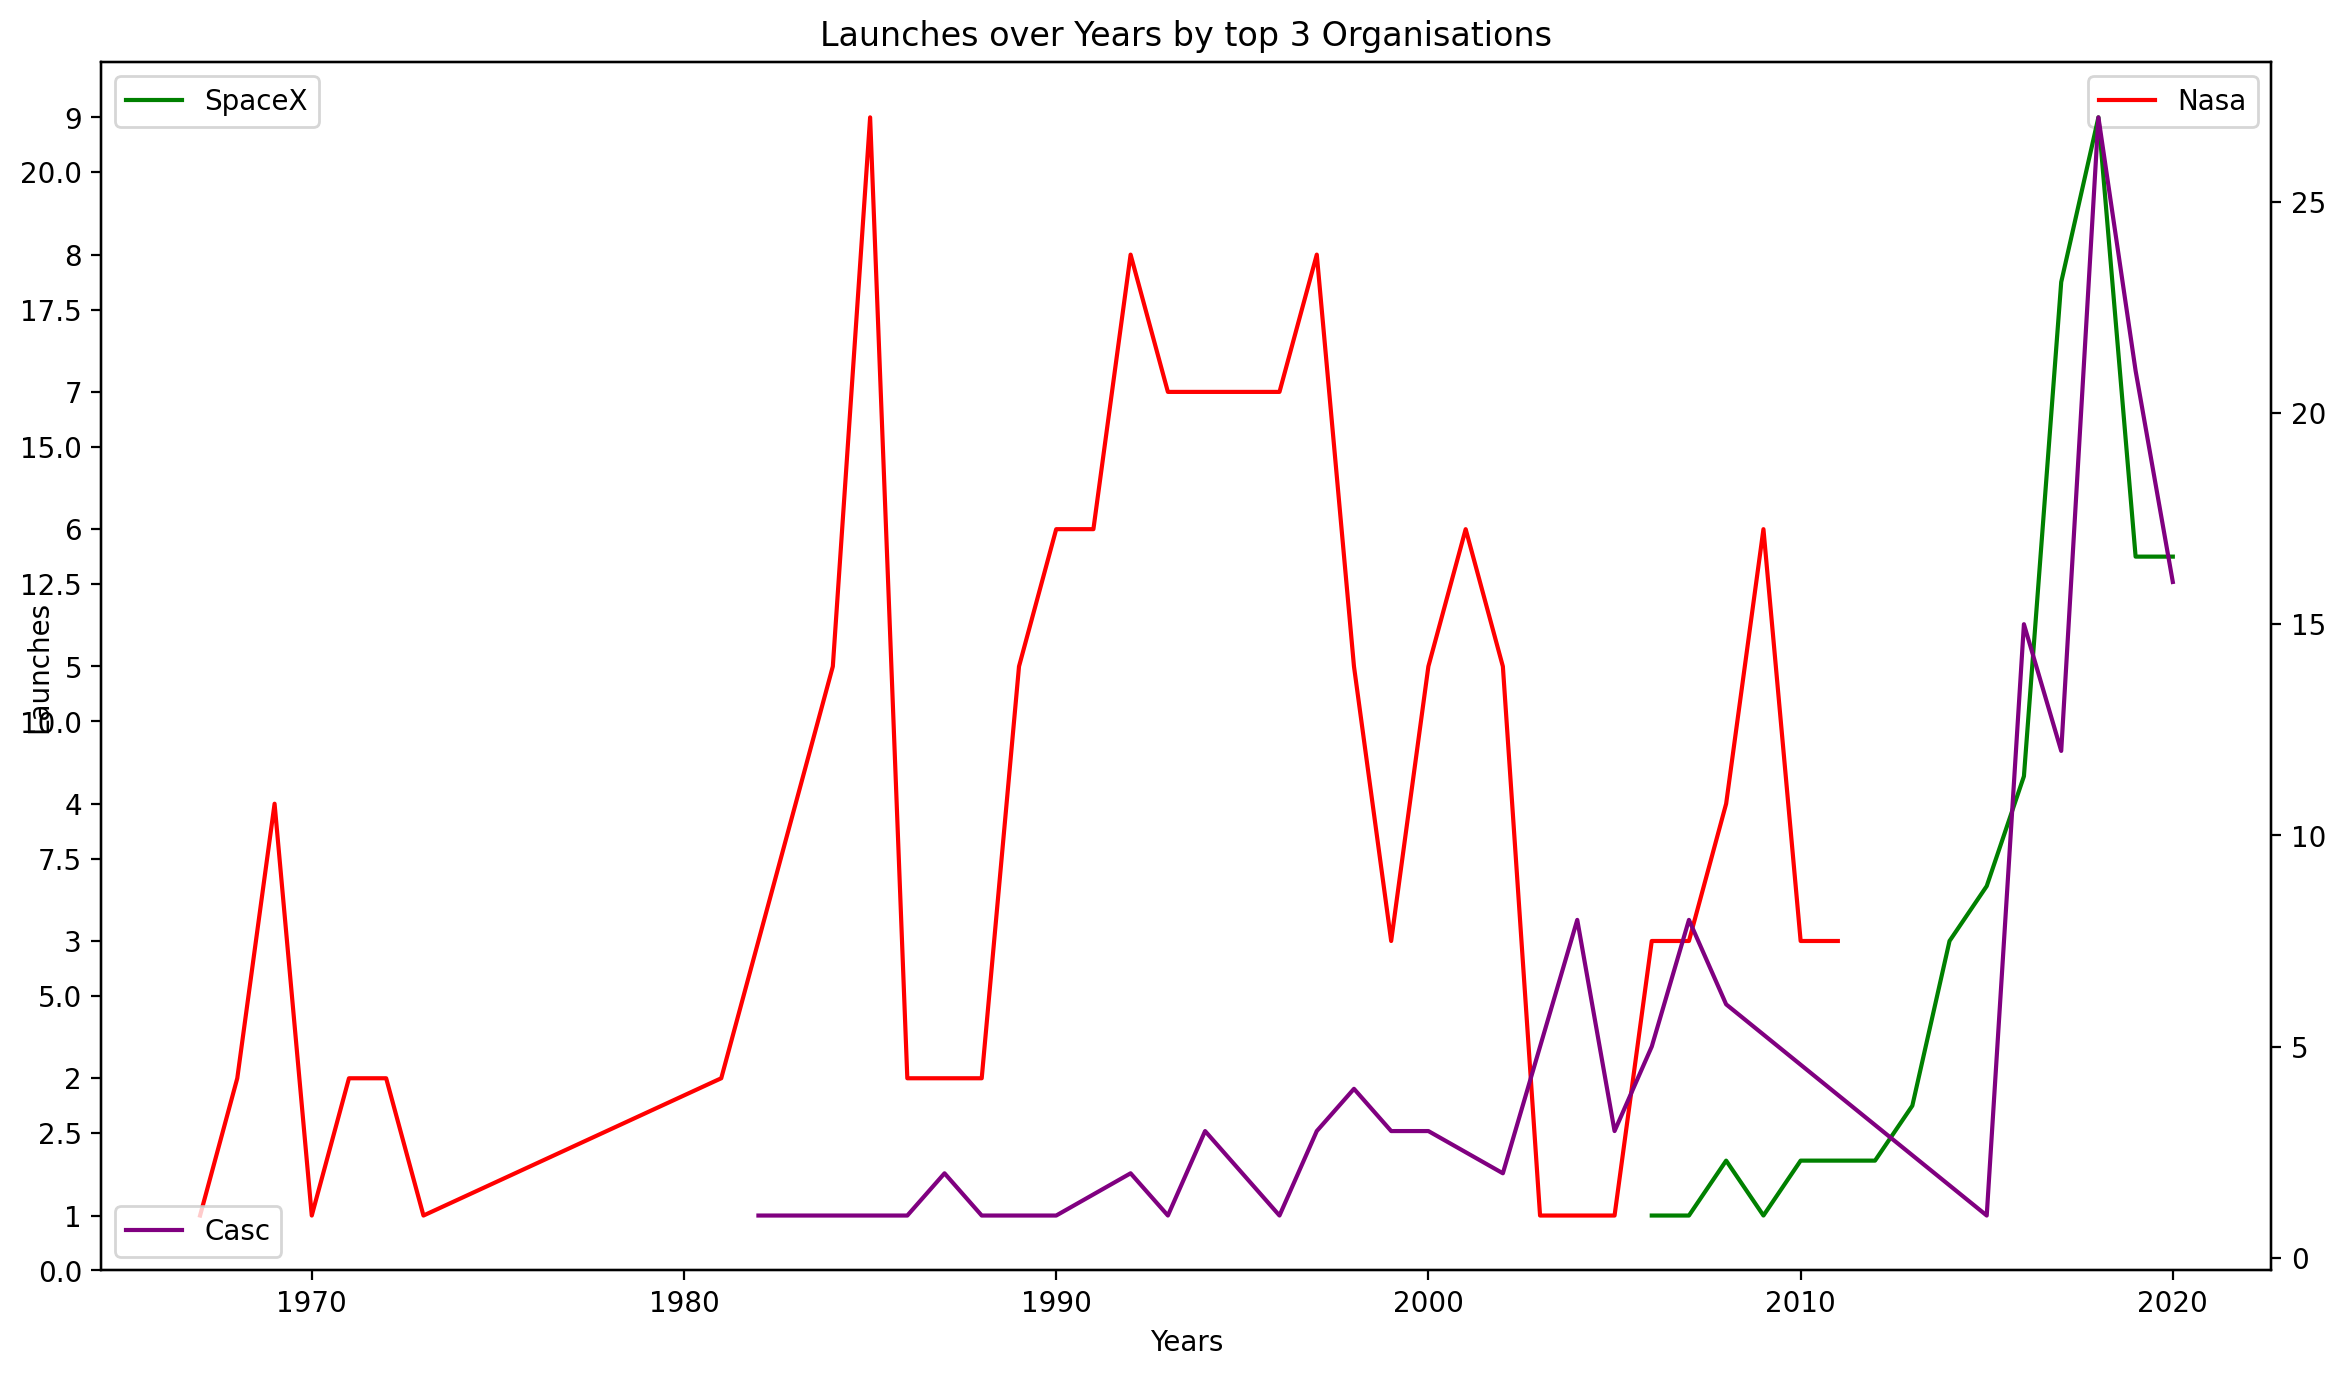

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title("Launches over Years by top 3 Organisations")
ax1 = plt.gca()
ax2 = plt.twinx()
ax3 = plt.twinx()

ax1.set_xlabel("Years")
ax1.set_ylabel("Launches")

ax1.plot(nasa.Year, nasa.Detail, color="red", label="Nasa")
ax2.plot(spacex.Year, spacex.Detail, color="green", label="SpaceX")
ax3.plot(casc.Year, casc.Detail, color="purple", label="Casc")
ax1.legend()
ax2.legend(loc=0)
ax3.legend(loc=3)
plt.show()

In [ ]:
ndf = df_data[["Organisation", "Year", "Detail"]].groupby(
    ["Organisation", "Year"]).agg({"Detail": pd.Series.count})
df_data.Organisation.value_counts()
ndf.drop(
    labels=[
            "Arianespace", "ULA", "ISRO", "MHI", "VKS RF", "US Air Force",
            "Roscosmos", "Kosmotras", "Rocket Lab", "Eurockot", "ILS", "Martin Marietta",
            "Boeing", "JAXA", "RVSN USSR", "Sandia", "ESA", "EER", "Virgin Orbit", "Northrop", "Lockheed",
            "ExPace"
    ],
    inplace=True
)
ndf.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(14,8))
px.line(
    ndf,
    x="Year",
    y="Detail",
    color="Organisation"
)

<Figure size 1008x576 with 0 Axes>

# Cold War Space Race: USA vs USSR



In [ ]:
df_data.head(30)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA",2020-07-15 13:46:00+00:00,Minotaur IV | NROL-129,StatusActive,46.00,Success
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10 04:17:00+00:00,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure


# Comparing the total number of launches of the USSR and the USA


In [ ]:
big_powers = df_data.loc[(df_data.Country == "USA") | (df_data.Country =="KAZ") | (df_data.Country == "RUS")]

In [ ]:
agg_launches = big_powers.groupby("Country", as_index=False).agg({"Detail": pd.Series.count})

In [ ]:
pie = px.pie(agg_launches, names="Country", values="Detail", title="Distribution of Launches over Countries")
pie.show()

# Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
year_on_year = big_powers.groupby(["Country", "Year"], as_index=False).agg({"Detail": pd.Series.count})

In [ ]:
bar = px.bar(year_on_year, "Year", "Detail", color="Country", barmode="group")
bar.show()

# Total Number of Mission Failures Year on Year.

In [ ]:
mission_failure = big_powers.groupby(["Country", "Mission_Status"], as_index=False).agg({"Detail": pd.Series.count})
mission_failure

,Country,Mission_Status,Detail
0,KAZ,Failure,2
1,KAZ,Partial Failure,1
2,KAZ,Success,43
3,RUS,Failure,1
4,RUS,Partial Failure,2
5,RUS,Success,51
6,USA,Failure,20
7,USA,Partial Failure,7
8,USA,Prelaunch Failure,1
9,USA,Success,462


In [ ]:
bar = px.bar(mission_failure, "Mission_Status", "Detail", barmode="group", color="Country")
bar.show()

# Leading Countries in terms of Total Number of Launches up to and including 2020


In [ ]:
rich_in_launch = df_data.groupby(["Year","Country"], as_index=False).agg({"Detail": pd.Series.count})
rich_in_launch.rename(columns={"Detail": "Launches"}, inplace=True)

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Number of Launches by Companies per Year")
plt.xlabel("Years")
plt.ylabel("# of Launches")


Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country', 'Year', 'Month'],
      dtype='object')

In [ ]:
scatters = px.scatter(rich_in_launch, x="Year", y="Launches", color="Country")
scatters.show()